In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#Graph 2

In [ ]:
df1 = pd.read_csv("/content/avg_throughput_fb.csv")

In [ ]:
df1.head(10)

,schType,speed,totalThroughPut
0,Proportional Fair,0,899882
1,Proportional Fair,0,1074090
2,Proportional Fair,0,1369680
3,Proportional Fair,0,846684
4,Proportional Fair,0,1215820
5,Round Robin,0,578140
6,Round Robin,0,742563
7,Round Robin,0,984722
8,Round Robin,0,638751
9,Round Robin,0,882803


In [ ]:
df1.columns = df1.columns.str.strip()
df1.columns

Index(['schType', 'speed', 'totalThroughPut'], dtype='object')

In [ ]:
average_throughput = df1.groupby(['schType','speed'])['totalThroughPut'].mean().reset_index()
print(average_throughput)

             schType  speed  totalThroughPut
0                BET      0         802952.6
1                BET      5         802952.6
2     Max Throughput      0        1732192.0
3     Max Throughput      5        1732192.0
4  Proportional Fair      0        1081231.2
5  Proportional Fair      5        1081231.2
6        Round Robin      0         765395.8
7        Round Robin      5         765395.8


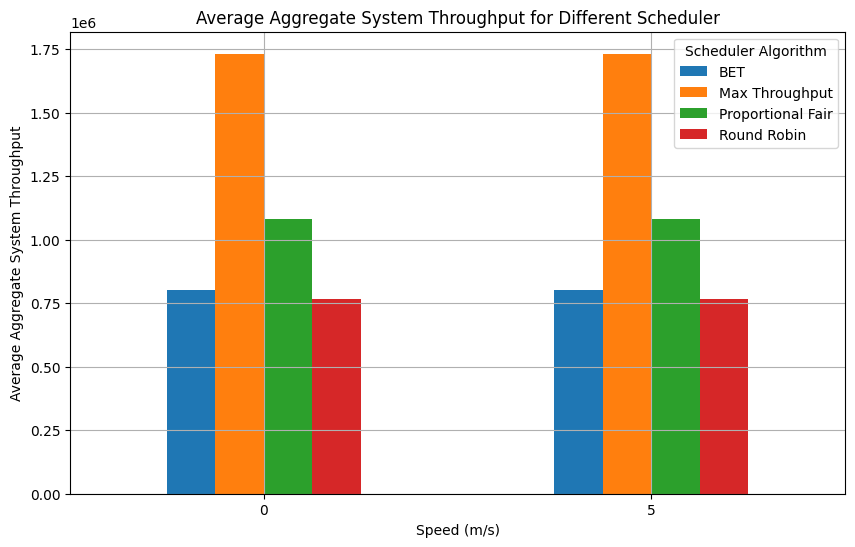

In [ ]:
pivot_table = average_throughput.pivot(index='speed', columns='schType', values='totalThroughPut')

# Plotting
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Speed (m/s)')
plt.ylabel('Average Aggregate System Throughput')
plt.title('Average Aggregate System Throughput for Different Scheduler')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Scheduler Algorithm')
plt.grid(True)
plt.show()

#Graph 3

For 0 speed


In [ ]:
df2 = pd.read_csv("/content/cdf_Throughput0_fb.csv",header = None);

In [ ]:
df2.head(20)

,0,1,2
0,Proportional Fair,0.582095,0.025
1,Proportional Fair,0.653191,0.050
2,Proportional Fair,0.68386,0.075
3,Proportional Fair,0.70354,0.100
4,Proportional Fair,0.705231,0.125
5,Proportional Fair,0.769343,0.150
6,Proportional Fair,0.828746,0.175
7,Proportional Fair,0.864323,0.200
8,Proportional Fair,0.940308,0.225
9,Proportional Fair,0.940308,0.250


In [ ]:
df2[0].unique()

array(['Proportional Fair', 'Round Robin', 'Max Throughput', 'BET'],
      dtype=object)

In [ ]:
def Plot(df2):
  df2 = df2.sort_values(by=df2.columns[1])

  sch = df2[0].unique()
  colors = ['c', 'b', 'r', 'g']

  fig, axs = plt.subplots(2, 2, figsize=(12, 8))

  for i, (algo, color) in enumerate(zip(sch, colors)):

      algo_data = df2[df2[0] == algo]
      num_data_points = len(algo_data)
      cdf = np.arange(1, num_data_points + 1) / num_data_points

      axs[i // 2, i % 2].plot(algo_data.iloc[:, 1], cdf, marker='.', linestyle='-', color=color, label=algo)
      axs[i // 2, i % 2].set_xlabel('Throughput')
      axs[i // 2, i % 2].set_ylabel('CDF')
      axs[i // 2, i % 2].set_title(f'CDF for {algo}')
      axs[i // 2, i % 2].legend()
      axs[i // 2, i % 2].grid(True)

  # Remove any empty subplot
  if len(sch) < 4:
      axs[-1, -1].axis('off')

  plt.tight_layout()
  plt.show()

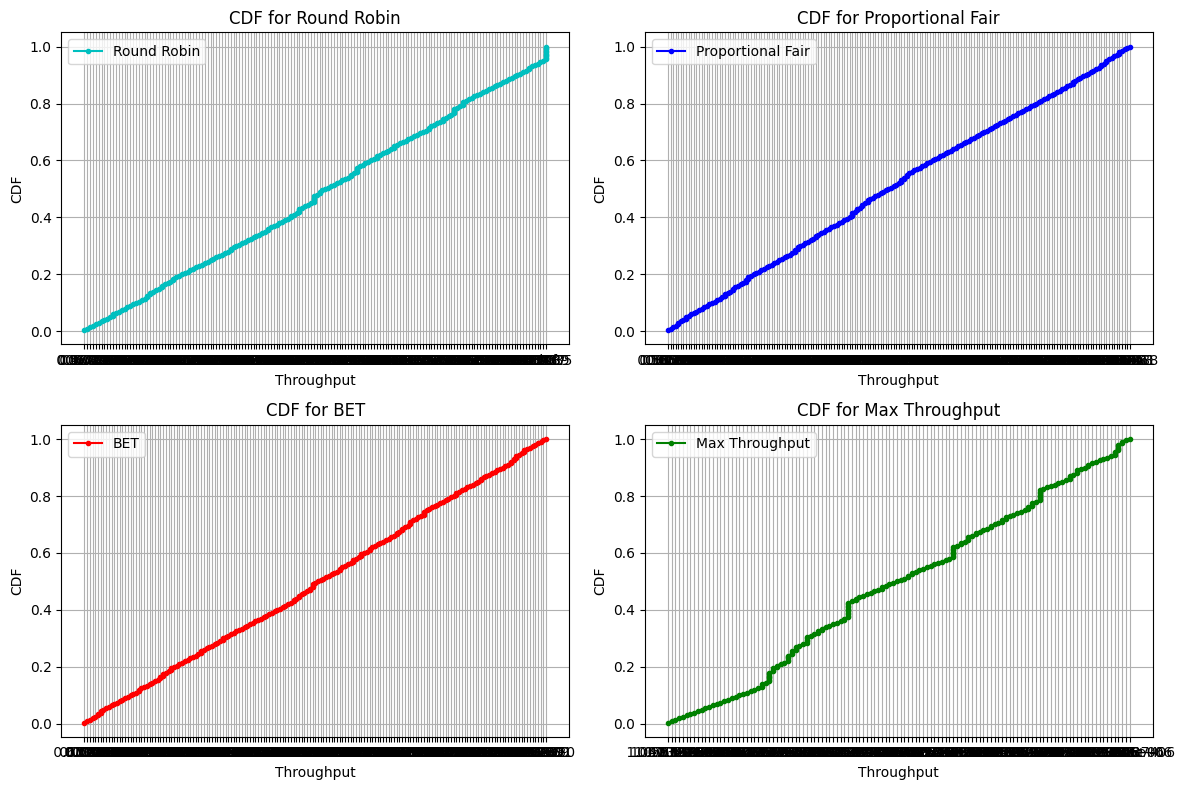

In [ ]:
Plot(df2)

For 5 m/s

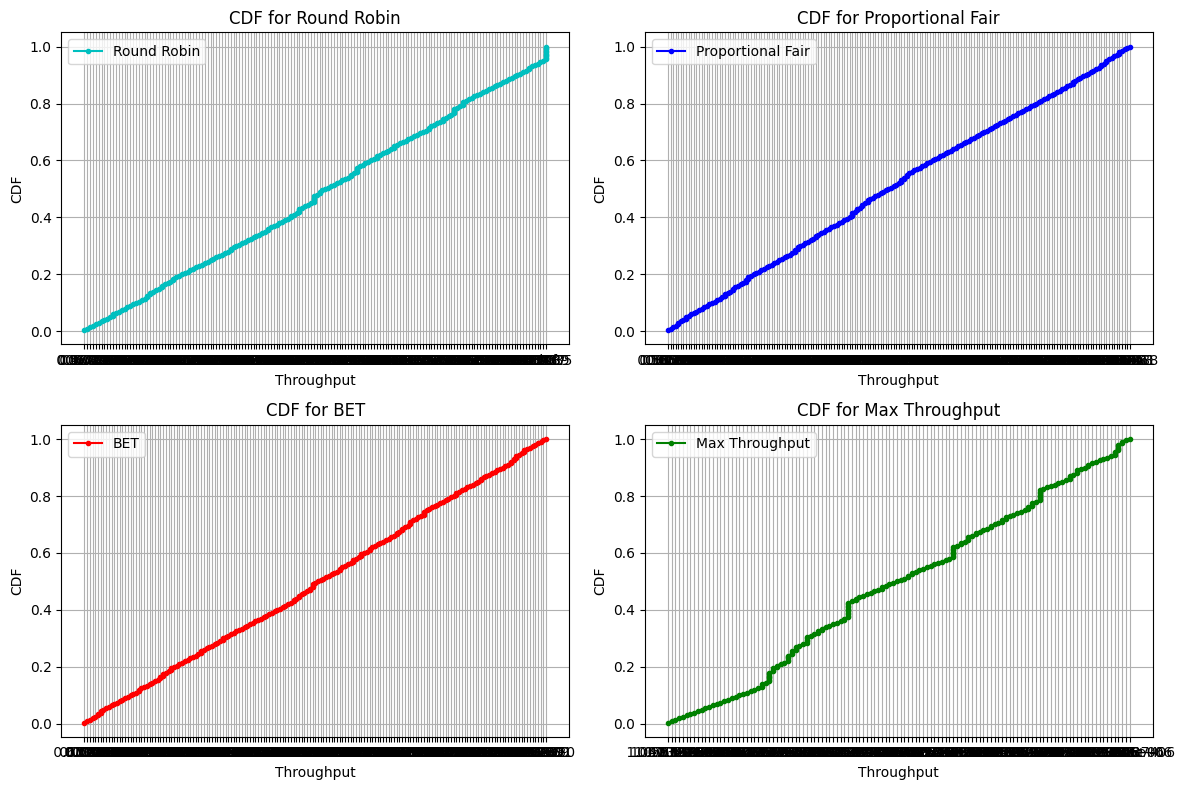

In [ ]:
df3 = pd.read_csv("/content/cdf_Throughput5_fb.csv",header = None);
Plot(df3)

#**Graph 4**

In [ ]:
def SINR(sinr_files,m):
  sched = ["RR", "PF", "MT", "BET"]
  colors = ['g', 'r', 'b', 'c']
  fig, axs = plt.subplots(2, 2, figsize=(12, 8))
  for i, sinr_file in enumerate(sinr_files):
      algo = sched[i]
      df_sinr = pd.read_csv(sinr_file, delimiter='\t', names=["time", "cellId", "IMSI", "RNTI", "rsrp", "sinr", "ComponentCarrierId"], skiprows=1)
      axs[i // 2, i % 2].plot(df_sinr.iloc[:, 0], df_sinr.iloc[:, 5], label=algo, color=colors[i])
      axs[i // 2, i % 2].set_xlabel('Time')
      axs[i // 2, i % 2].set_ylabel('SINR')
      axs[i // 2, i % 2].set_title(f'Time vs. SINR for {algo} at {m} m/s')
      axs[i // 2, i % 2].legend()

  plt.tight_layout()
  plt.show()

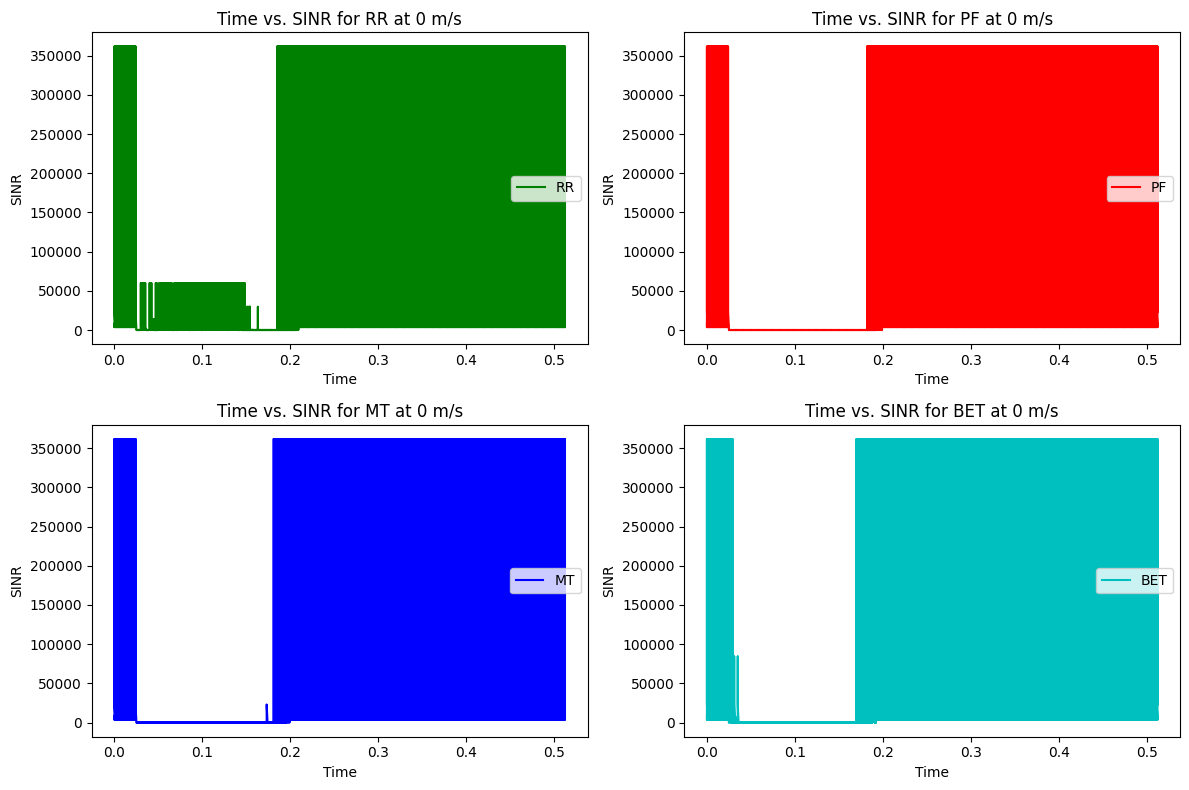

In [ ]:
sinr_files = ["DlRsrpSinrStats0_RR.txt", "DlRsrpSinrStats0_PF.txt", "DlRsrpSinrStats0_MT.txt", "DlRsrpSinrStats0_BET.txt"]
SINR(sinr_files,0)

#**Graph 5**

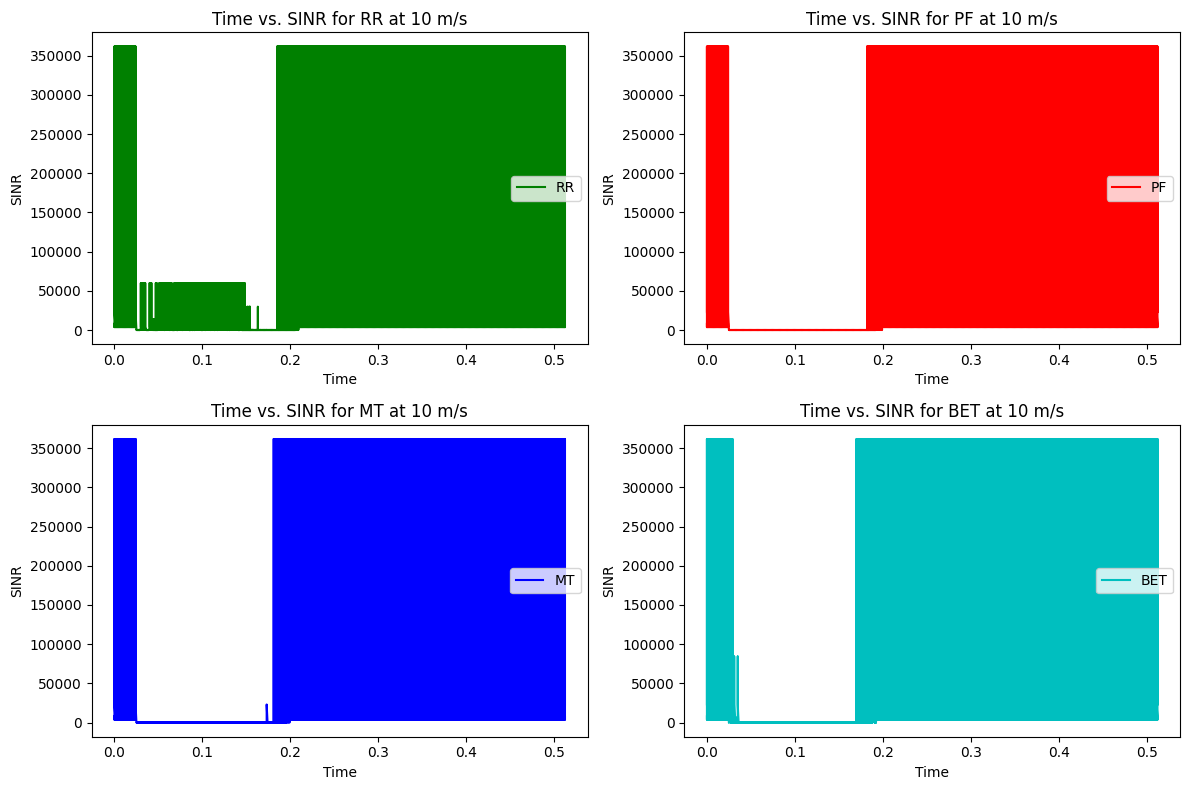

In [ ]:
sinr_files = ["DlRsrpSinrStats5_RR.txt", "DlRsrpSinrStats5_PF.txt", "DlRsrpSinrStats5_MT.txt", "DlRsrpSinrStats5_BET.txt"]
SINR(sinr_files,10)

#**Graph 6**

In [ ]:
df6 = pd.read_csv("/content/avg_throughput_nb.csv")

In [ ]:
df6.head(5)

,schType,speed,totalThroughPut
0,Proportional Fair,0,916921
1,Proportional Fair,0,959456
2,Proportional Fair,0,1093000
3,Proportional Fair,0,894115
4,Proportional Fair,0,1029010


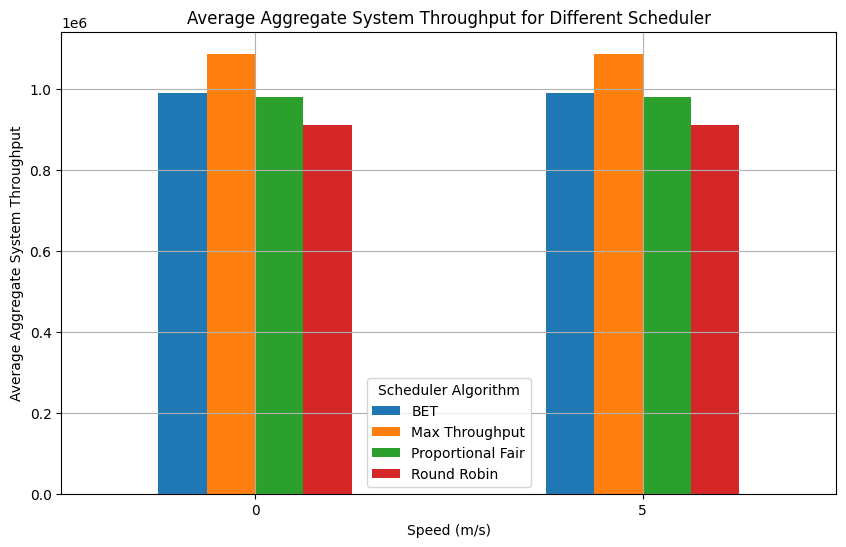

In [ ]:
df6.columns = df1.columns.str.strip()
average_throughput = df6.groupby(['schType','speed'])['totalThroughPut'].mean().reset_index()

pivot_table = average_throughput.pivot(index='speed', columns='schType', values='totalThroughPut')

# Plotting
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Speed (m/s)')
plt.ylabel('Average Aggregate System Throughput')
plt.title('Average Aggregate System Throughput for Different Scheduler')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Scheduler Algorithm')
plt.grid(True)
plt.show()

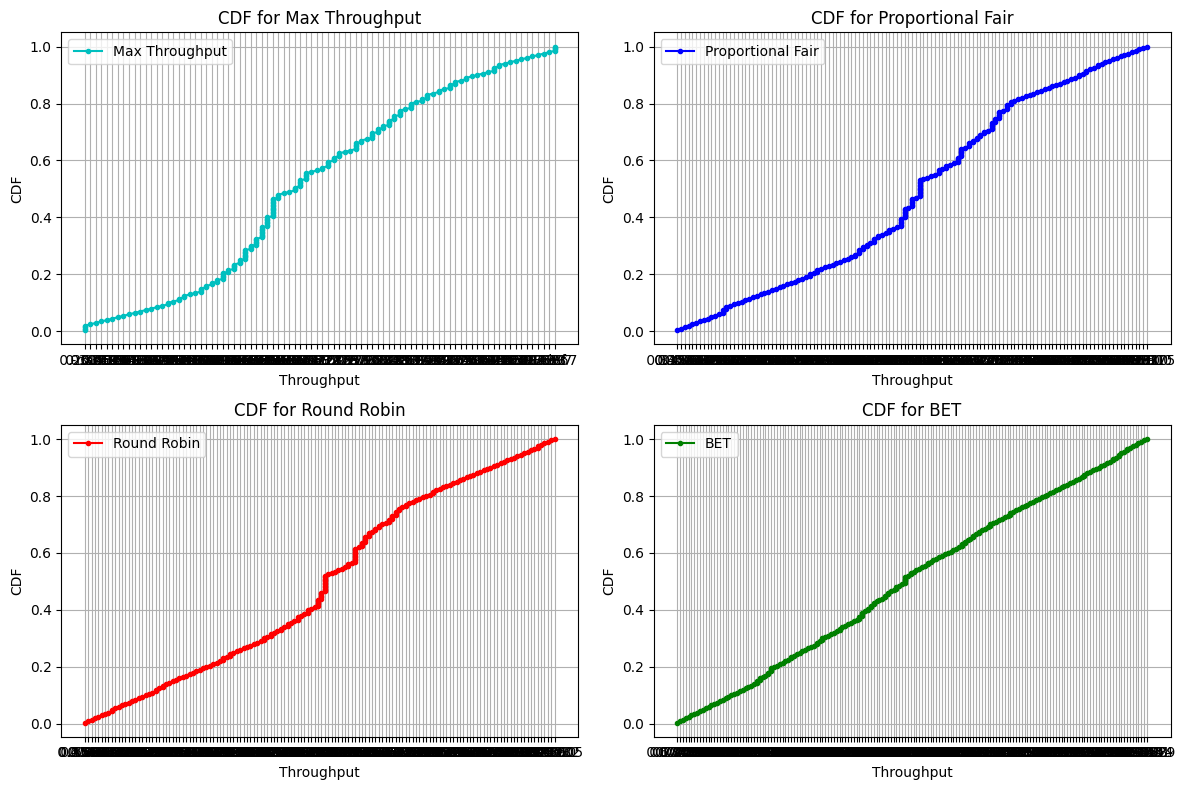

In [ ]:
df7 = pd.read_csv("/content/cdf_Throughput0_nb.csv",header = None);
Plot(df7)

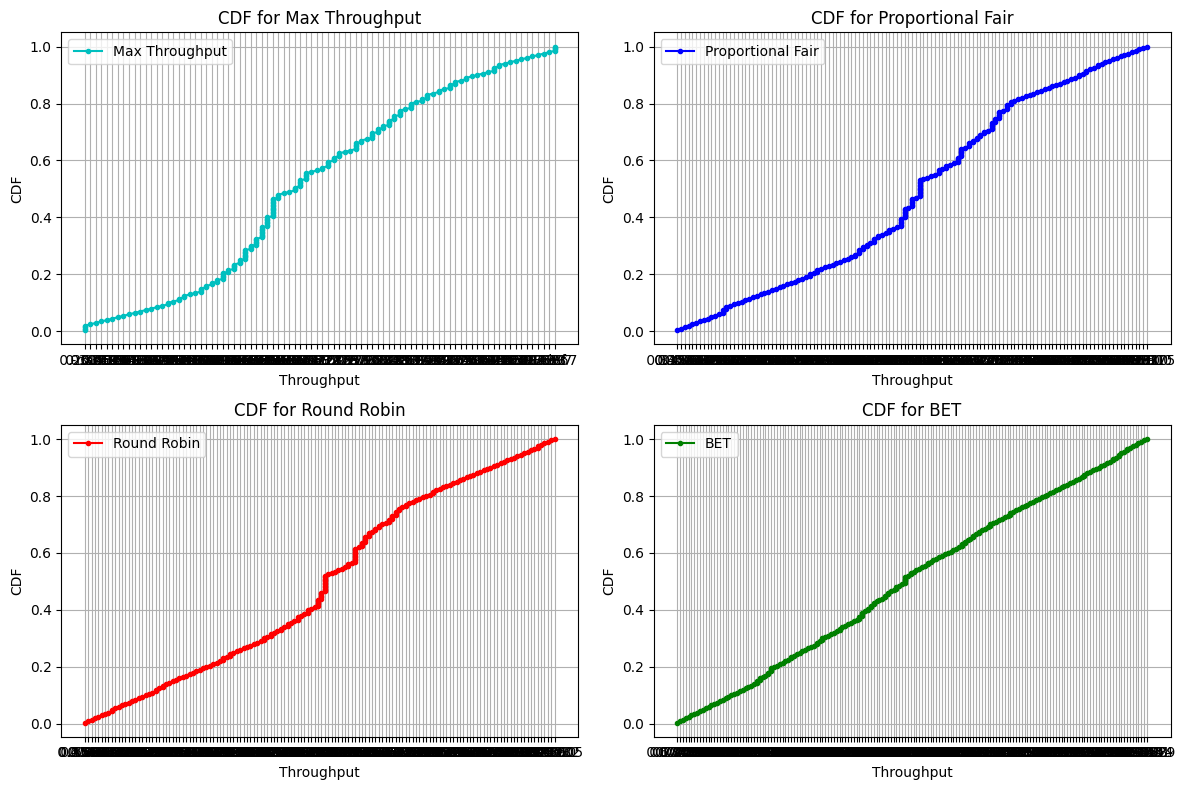

In [ ]:
df8 = pd.read_csv("/content/cdf_Throughput5_nb.csv",header = None);
Plot(df8)